In [99]:
# Importar las bibliotecas necesarias
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Definir una función para graficar con fondo rosado
def graficar_con_fondo_rosado(y_real, y_pred, titulo):
    plt.figure(figsize=(10, 6))
    plt.gca().set_facecolor('#FFB6C1')  # Establecer el fondo a color rosado

    # Graficar los valores reales
    plt.plot(y_real, label='Valores reales', color='blue', marker='o')

    # Graficar las predicciones
    plt.plot(y_pred, label='Predicciones', color='red', linestyle='--', marker='x')

    # Configuración del gráfico
    plt.title(titulo)
    plt.xlabel('Patrones')
    plt.ylabel('Clases')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()  # Ajustar el diseño para que no se solapen los elementos

    # Mostrar el gráfico
    plt.show()


In [100]:
# Definir la Red Neuronal
class RedNeuronal(nn.Module):
    def __init__(self):
        super(RedNeuronal, self).__init__()
        self.fc1 = nn.Linear(2, 4)  # 2 entradas -> 4 neuronas ocultas
        self.relu = nn.ReLU()  # Función de activación ReLU en la capa oculta
        self.dropout = nn.Dropout(0.2)  # Dropout para evitar sobreajuste
        self.fc2 = nn.Linear(4, 3)  # 4 neuronas ocultas -> 3 salidas (clases)
        self.sigmoid = nn.Sigmoid()  # Sigmoid para la salida
    
    def forward(self, x):
        x = self.relu(self.fc1(x))  # Paso por la capa oculta con ReLU
        x = self.dropout(x)  # Aplicar dropout
        x = self.sigmoid(self.fc2(x))  # Paso por la capa de salida con Sigmoid
        return x

# Crear una instancia del modelo
modelo = RedNeuronal()

In [101]:
# Cargar y preprocesar los datos

# Datos de entrada (X1 y X2) y etiquetas (Clases)
X_train = np.array([
    [3.50, 1.40],
    [3.40, 1.50],
    [3.20, 1.20],
    [3.20, 1.60],
    [3.20, 4.70],
    [2.90, 4.30],
    [3.00, 4.20],
    [3.20, 5.30],
    [2.80, 5.60],
    [3.00, 6.10]
])

y_train = np.array([1, 1, 2, 3, 2, 2, 1, 3, 3, 1])  # Etiquetas

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convertir los datos de entrenamiento a tensores de PyTorch
X_train_torch = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_torch = torch.tensor(y_train - 1, dtype=torch.long)  # Restar 1 para ajustarlo a 0, 1, 2


In [102]:
# Entrenar el modelo

# Definir el optimizador y la función de pérdida
optimizer = optim.Adam(modelo.parameters(), lr=0.001)  # Tasa de aprendizaje baja para evitar sobreajuste
criterion = nn.CrossEntropyLoss()

epochs = 2000  # Aumentamos el número de épocas para un entrenamiento más robusto

# Ciclo de entrenamiento
for epoch in range(epochs):
    optimizer.zero_grad()  # Limpiar los gradientes
    output = modelo(X_train_torch)  # Paso hacia adelante
    loss = criterion(output, y_train_torch)  # Calcular la pérdida
    loss.backward()  # Paso hacia atrás
    optimizer.step()  # Actualizar los pesos

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/2000], Loss: 1.0828
Epoch [200/2000], Loss: 1.0677
Epoch [300/2000], Loss: 1.0878
Epoch [400/2000], Loss: 1.0653
Epoch [500/2000], Loss: 1.0893
Epoch [600/2000], Loss: 1.0520
Epoch [700/2000], Loss: 1.0331
Epoch [800/2000], Loss: 1.0521
Epoch [900/2000], Loss: 1.0173
Epoch [1000/2000], Loss: 1.0606
Epoch [1100/2000], Loss: 1.0260
Epoch [1200/2000], Loss: 0.9996
Epoch [1300/2000], Loss: 1.0002
Epoch [1400/2000], Loss: 0.9518
Epoch [1500/2000], Loss: 0.9814
Epoch [1600/2000], Loss: 0.9772
Epoch [1700/2000], Loss: 1.0072
Epoch [1800/2000], Loss: 0.9087
Epoch [1900/2000], Loss: 0.9223
Epoch [2000/2000], Loss: 1.0448


Predicciones del modelo con PyTorch: [1 1 2 2 1 2 2 1 3 3]
Precisión del modelo: 50.00%

Reporte de clasificación detallado:
              precision    recall  f1-score   support

     Clase 1       0.50      0.50      0.50         4
     Clase 2       0.50      0.67      0.57         3
     Clase 3       0.50      0.33      0.40         3

    accuracy                           0.50        10
   macro avg       0.50      0.50      0.49        10
weighted avg       0.50      0.50      0.49        10



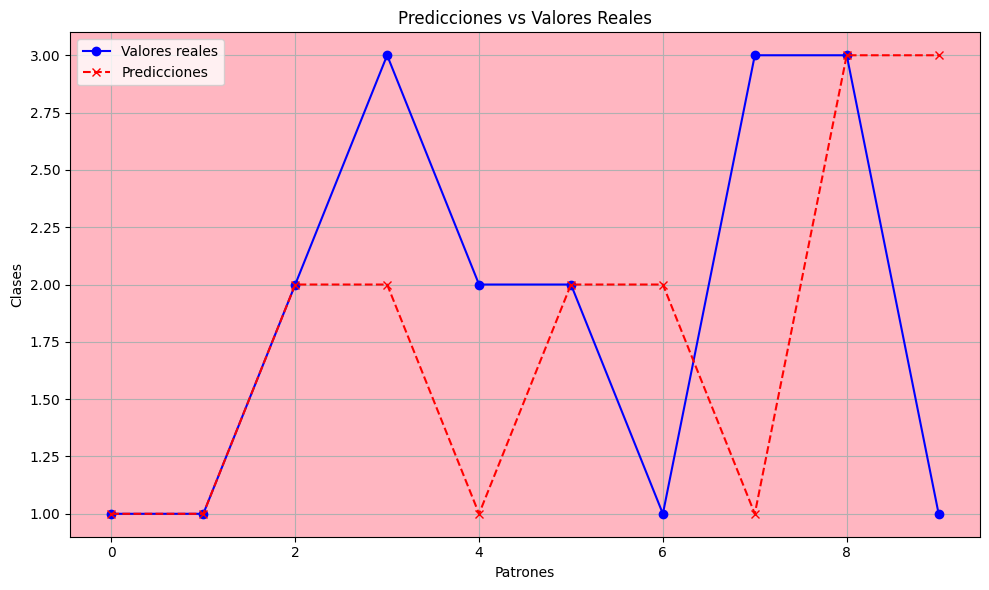

In [103]:
# Predicción y evaluación

# Usamos los mismos datos de entrenamiento para predecir (puedes cambiar por un conjunto de test si lo tienes)
X_test_scaled = scaler.transform(X_train)
X_test_torch = torch.tensor(X_test_scaled, dtype=torch.float32)

# Colocar el modelo en modo evaluación
modelo.eval()

# Realizar predicciones
predicciones_torch = modelo(X_test_torch)
y_pred_torch = torch.argmax(predicciones_torch, dim=1) + 1  # Sumar 1 para obtener las clases correctas

# Mostrar las predicciones
print("Predicciones del modelo con PyTorch:", y_pred_torch.numpy())

# Evaluar precisión
accuracy = accuracy_score(y_train, y_pred_torch.numpy())
print(f"Precisión del modelo: {accuracy * 100:.2f}%")

# Mostrar el reporte de clasificación
print("\nReporte de clasificación detallado:")
print(classification_report(y_train, y_pred_torch.numpy(), target_names=['Clase 1', 'Clase 2', 'Clase 3'], zero_division=0))

# Graficar predicciones vs valores reales
graficar_con_fondo_rosado(y_train, y_pred_torch.numpy(), "Predicciones vs Valores Reales")


In [104]:
# Guardar el modelo entrenado
torch.save(modelo.state_dict(), 'modelo_entrenado.pth')
print("Modelo guardado en 'modelo_entrenado.pth'")

Modelo guardado en 'modelo_entrenado.pth'


In [106]:
# Cargar el modelo entrenado con weights_only=True
modelo_cargado = RedNeuronal()
modelo_cargado.load_state_dict(torch.load('modelo_entrenado.pth', weights_only=True))
modelo_cargado.eval()  # Establecer el modelo en modo evaluación

print("Modelo cargado y listo para evaluar")


Modelo cargado y listo para evaluar


In [107]:
# Predicción con el modelo cargado

# Realizar predicciones con el modelo cargado
predicciones_cargadas = modelo_cargado(X_test_torch)
y_pred_cargado = torch.argmax(predicciones_cargadas, dim=1) + 1  # Sumar 1 para obtener las clases correctas

# Mostrar las predicciones del modelo cargado
print("Predicciones del modelo cargado:", y_pred_cargado.numpy())

# Evaluar precisión del modelo cargado
accuracy_cargado = accuracy_score(y_train, y_pred_cargado.numpy())
print(f"Precisión del modelo cargado: {accuracy_cargado * 100:.2f}%")


Predicciones del modelo cargado: [1 1 2 2 1 2 2 1 3 3]
Precisión del modelo cargado: 50.00%


Predicciones originales del modelo entrenado: [1 1 2 2 1 2 2 1 3 3]
Predicciones del modelo cargado: [1 1 2 2 1 2 2 1 3 3]

¿Las predicciones del modelo original y el modelo cargado son iguales?: True


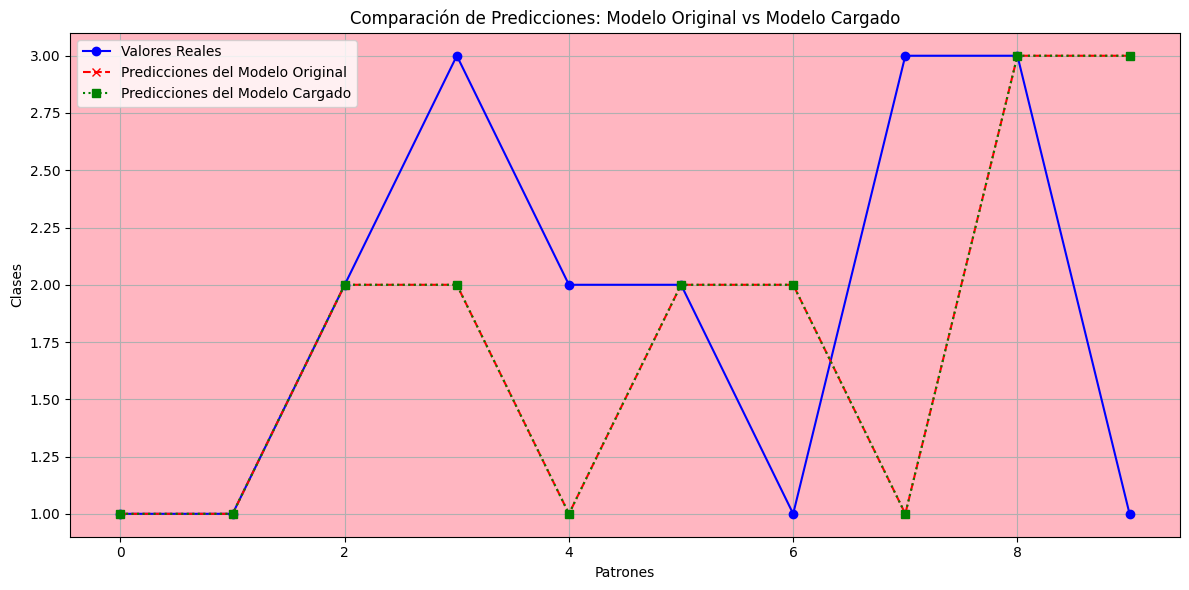

In [108]:
# Comparar predicciones del modelo original y del modelo cargado

# Predicciones del modelo entrenado (ya calculadas previamente en Bloque 5)
print("Predicciones originales del modelo entrenado:", y_pred_torch.numpy())

# Predicciones del modelo cargado (calculadas en el Bloque 8)
print("Predicciones del modelo cargado:", y_pred_cargado.numpy())

# Verificar si las predicciones son exactamente iguales
son_iguales = np.array_equal(y_pred_torch.numpy(), y_pred_cargado.numpy())
print(f"\n¿Las predicciones del modelo original y el modelo cargado son iguales?: {son_iguales}")

# Graficar comparaciones entre el modelo entrenado y el modelo cargado
plt.figure(figsize=(12, 6))
plt.gca().set_facecolor('#FFB6C1')  # Fondo rosado

# Graficar las predicciones del modelo original
plt.plot(y_train, label='Valores Reales', color='blue', marker='o')
plt.plot(y_pred_torch.numpy(), label='Predicciones del Modelo Original', color='red', linestyle='--', marker='x')

# Graficar las predicciones del modelo cargado
plt.plot(y_pred_cargado.numpy(), label='Predicciones del Modelo Cargado', color='green', linestyle=':', marker='s')

# Configurar el gráfico
plt.title('Comparación de Predicciones: Modelo Original vs Modelo Cargado')
plt.xlabel('Patrones')
plt.ylabel('Clases')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
